# Chapter 4: Linear Regression

## Author: Rahul Bhadani

# 1. Generating Scatter Plot

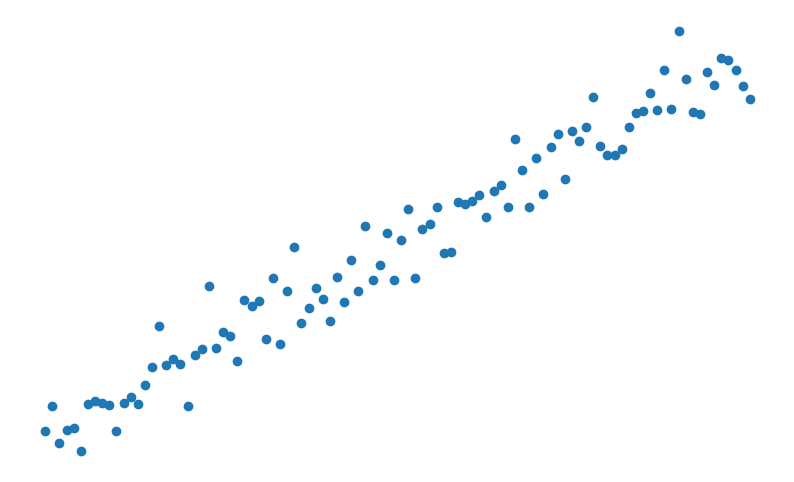

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Create a line equation
y = 3.0*x + 77.0

# Add Gaussian noise
mu = 0  # Mean of the Gaussian noise
sigma = 2  # Standard deviation of the Gaussian noise
noise = np.random.normal(mu, sigma, y.shape)
y_noisy = y + noise

## Make a plot
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y_noisy)
plt.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
fig.patch.set_alpha(0.0)
plt.savefig('../figures/scatterplot.png', transparent=True)
plt.show()

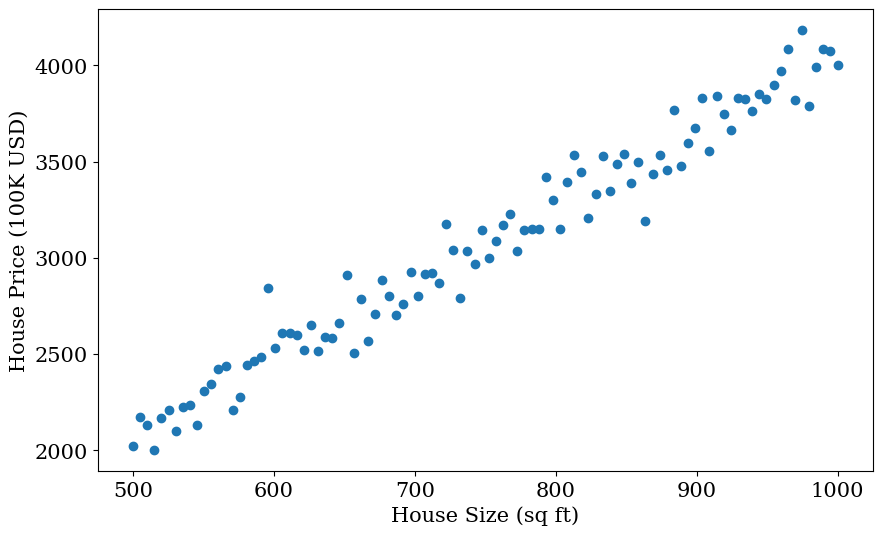

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# Generate x values
x = np.linspace(500, 1000, 100)

# Create a line equation
y = 4.0*x + 7.0

# Add Gaussian noise
mu = 60  # Mean of the Gaussian noise
sigma = 102  # Standard deviation of the Gaussian noise
noise = np.random.normal(mu, sigma, y.shape)
y_noisy = y + noise

## Make a plot
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y_noisy)
fig.patch.set_alpha(0.0)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price (100K USD)')
plt.savefig('../figures/scatterplot_2.png', transparent=True)
plt.show()

# 2. SLR Using Scikit-Learning

In [29]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# Read data
data = pd.read_csv("../Data/HousePrices/kc_house_data.csv")
data.dropna(inplace=True) #remove drop na (not a number)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Drop the non-sensical variables that are not useful for regression

In [30]:
dropColumns = ['id', 'date', 'zipcode']
data = data.drop(dropColumns, axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503


## Get the dependent and independent variable

In [31]:
y = data['price']
X = data[['sqft_living']]  # Ensure X is a 2D array because scikit-learn Linear Regressione expects 2D Array (n_samples, n_features)).  Even if there is only one feature, it still needs to be shaped as a 2D array with one column.


## Make a plot between dependent and independent variable

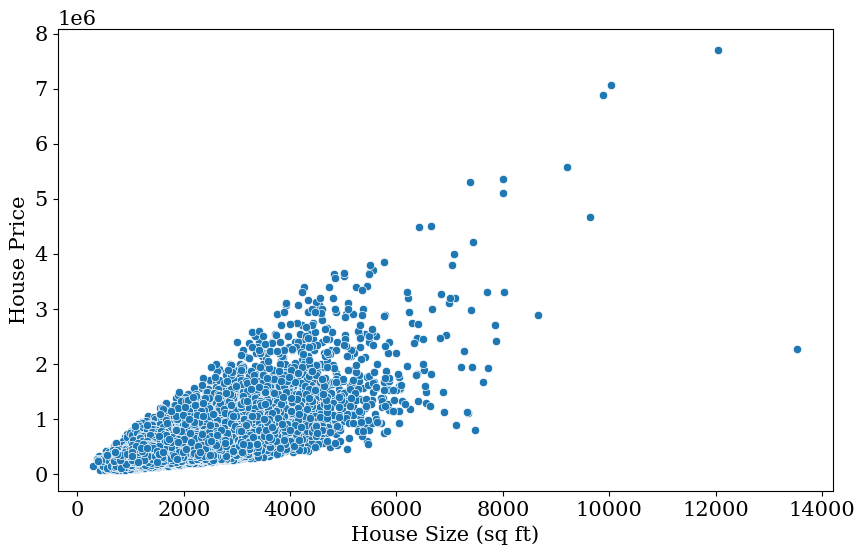

In [32]:
## Make a plot
# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
#plt.scatter(data['sqft_living'], data['price'])
# We will use seaborn for plotting
sns.scatterplot(x='sqft_living', y='price', data=data, ax=ax)

fig.patch.set_alpha(0.0)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price')
plt.savefig('../figures/scatterplot_3.png', transparent=True)
plt.show()

## Dividing the data into training and testing set


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Building the Linear Regression Model using One Feature Only

In [34]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model on the test dataset
# coefficient of determination of the prediction
print(linearModel.score(X_test, y_test))

0.4942921794156424


Since the score is 0.469, it is not a good score. But nonetheless, let's use that to make a prediction using a new data points

## Make a Prediction on trained model using a new data point

In [35]:
# Create a new data point
# Alternative: new_data_point = [[5000]]  # Note the double brackets to make it a 2D array

new_data_point = pd.DataFrame({'sqft_living': [5000]})

# Make the prediction
predicted_price = linearModel.predict(new_data_point)

print(f"Predicted price for a house with 5000 sqft living area: ${predicted_price[0]:,.2f}")

Predicted price for a house with 5000 sqft living area: $1,346,304.63


# 3. Toluca Dataset Example

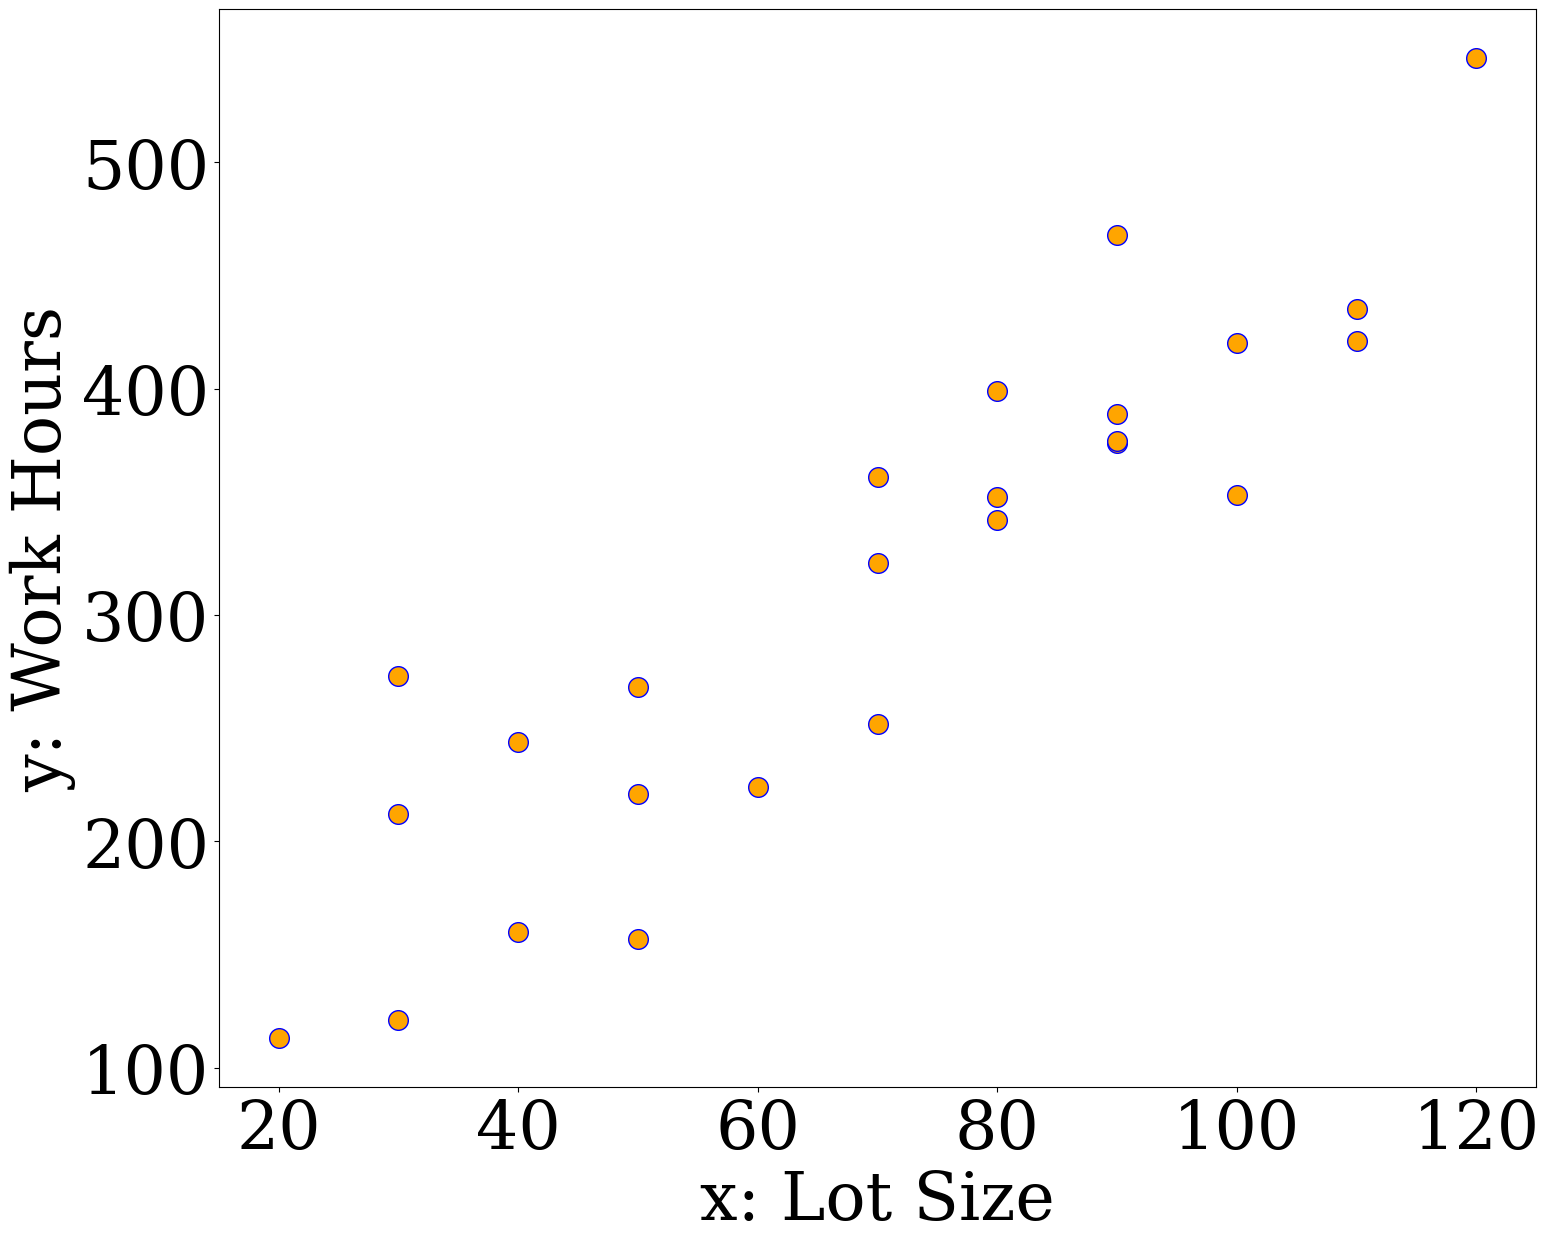

In [36]:
toluca = pd.read_csv('../Data/Toluca/toluca.txt', sep='\t')
x = toluca['LotSize'].to_numpy()
y = toluca['WorkHours'].to_numpy()
# plt.scatter(x, y, c='orange', edgecolors='blue')
# plt.xlim([0, 123])
plt.rcParams['font.size'] = 48



fig, ax = plt.subplots(figsize=(17, 14))
plt.scatter(x, y, c='orange', edgecolors='blue', s=200)
fig.patch.set_alpha(0.0)
plt.xlabel('x: Lot Size')
plt.ylabel('y: Work Hours')
plt.savefig('../figures/Toluca_Scatter.pdf', transparent=True)

## Fitting a Regression Model

[3.57020202]
62.36585858585849


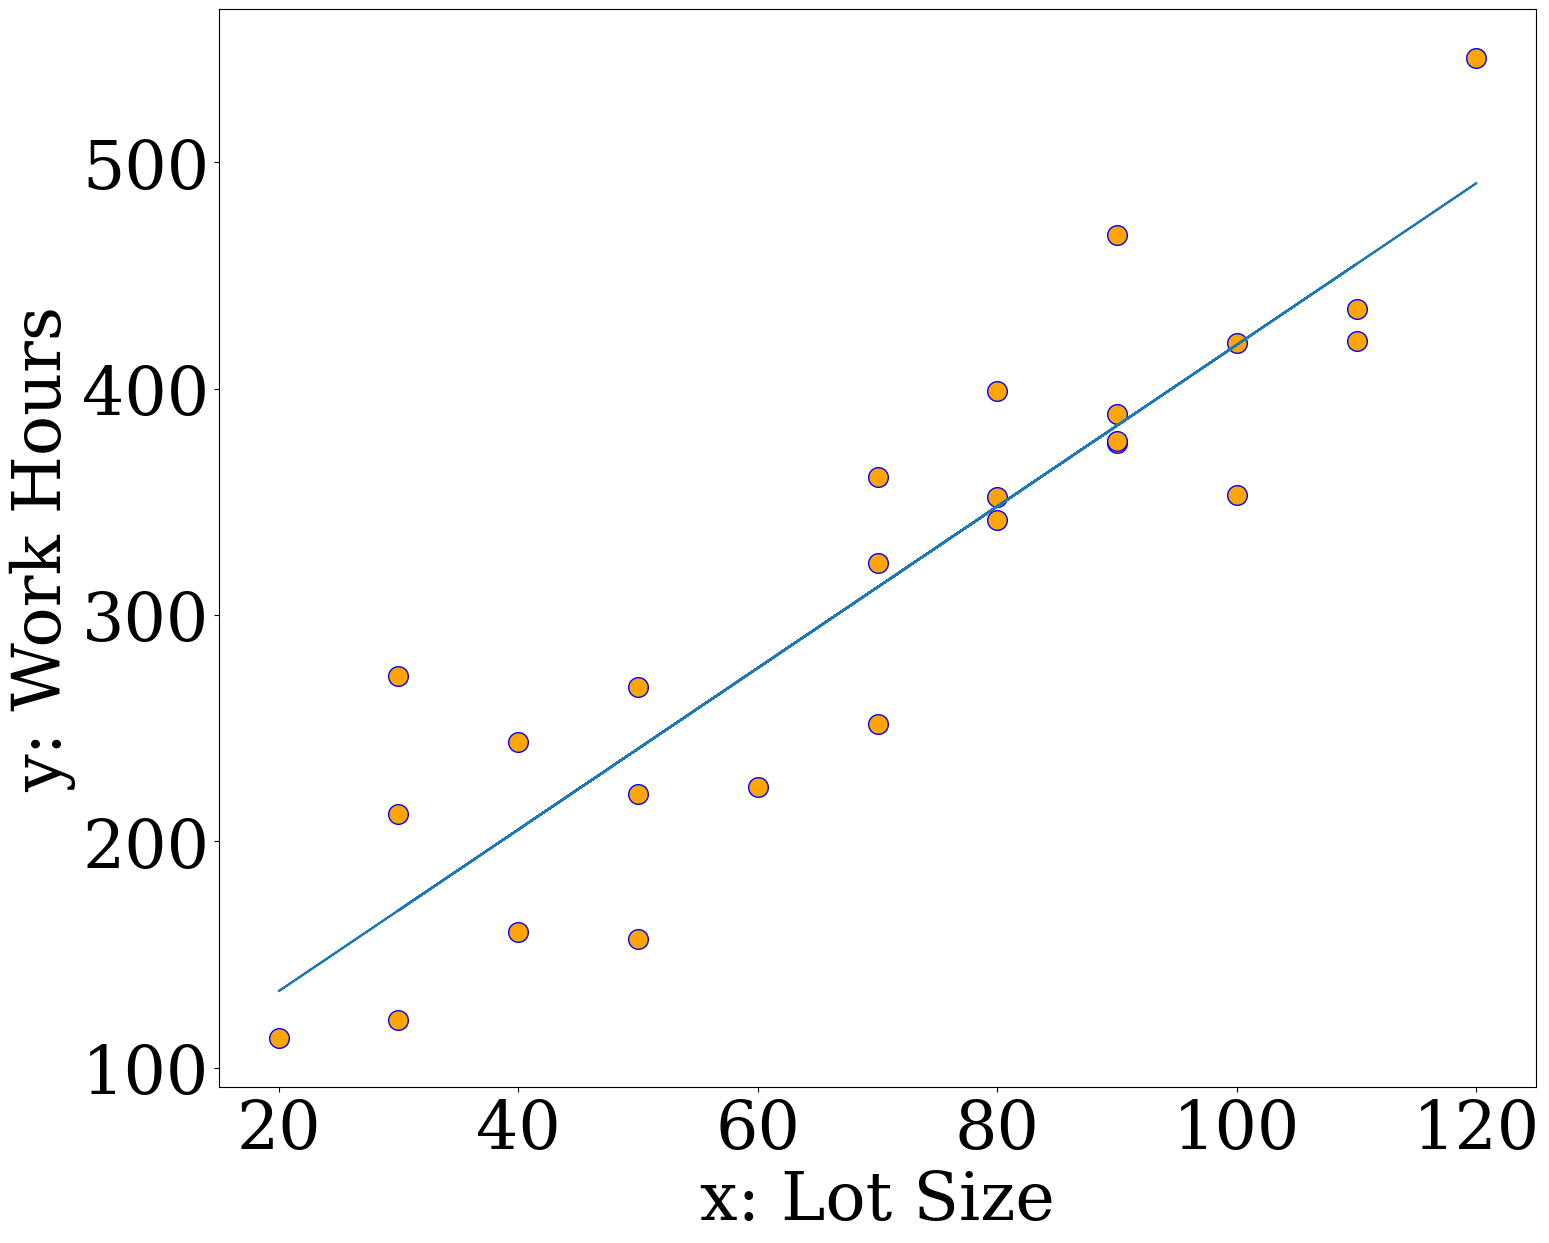

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape((-1, 1)), y)
print(reg.coef_) # w_1
print(reg.intercept_) #w_0
fig, ax = plt.subplots(figsize=(17, 14))
plt.scatter(x, y, c='orange', edgecolors='blue', s=200)
fig.patch.set_alpha(0.0)
plt.xlabel('x: Lot Size')
plt.ylabel('y: Work Hours')
yhat = reg.coef_*x + reg.intercept_
plt.plot(x, yhat)
plt.savefig('../figures/Toluca_Regressed.pdf', transparent=True)

## Prediction on the Fitted Model

In [38]:
reg.predict([[50.0], [100.0]])

array([240.8759596 , 419.38606061])

## Calculating Goodness of Fit

In [39]:
# Calculate and print R^2
r_squared = reg.score(x.reshape((-1, 1)), y)
print("R^2 (Coefficient of Determination):", r_squared)

R^2 (Coefficient of Determination): 0.8215334744346307


# 4. Percentile Calculation for Chi^2

In [40]:
from scipy.stats import chi2
# Given percentile and degrees of freedom
percentile = 0.90
degrees_of_freedom = 5
# Calculate the 90th percentile of the chi-squared distribution
chi2_value = chi2.ppf(percentile, degrees_of_freedom)
print(f"The 90th percentile of the chi-squared distribution with {degrees_of_freedom} degrees of freedom is: {chi2_value:.2f}")


The 90th percentile of the chi-squared distribution with 5 degrees of freedom is: 9.24


# 5. Linear Regression on a Synthetic Dataset using PyTorch

Epoch [10/500], Loss: 267.8081
Epoch [20/500], Loss: 226.0095
Epoch [30/500], Loss: 190.7549
Epoch [40/500], Loss: 161.0196
Epoch [50/500], Loss: 135.9396
Epoch [60/500], Loss: 114.7861
Epoch [70/500], Loss: 96.9444
Epoch [80/500], Loss: 81.8959
Epoch [90/500], Loss: 69.2033
Epoch [100/500], Loss: 58.4979
Epoch [110/500], Loss: 49.4685
Epoch [120/500], Loss: 41.8527
Epoch [130/500], Loss: 35.4292
Epoch [140/500], Loss: 30.0113
Epoch [150/500], Loss: 25.4417
Epoch [160/500], Loss: 21.5875
Epoch [170/500], Loss: 18.3366
Epoch [180/500], Loss: 15.5948
Epoch [190/500], Loss: 13.2822
Epoch [200/500], Loss: 11.3316
Epoch [210/500], Loss: 9.6864
Epoch [220/500], Loss: 8.2988
Epoch [230/500], Loss: 7.1284
Epoch [240/500], Loss: 6.1413
Epoch [250/500], Loss: 5.3087
Epoch [260/500], Loss: 4.6064
Epoch [270/500], Loss: 4.0141
Epoch [280/500], Loss: 3.5146
Epoch [290/500], Loss: 3.0932
Epoch [300/500], Loss: 2.7378
Epoch [310/500], Loss: 2.4380
Epoch [320/500], Loss: 2.1852
Epoch [330/500], Loss: 

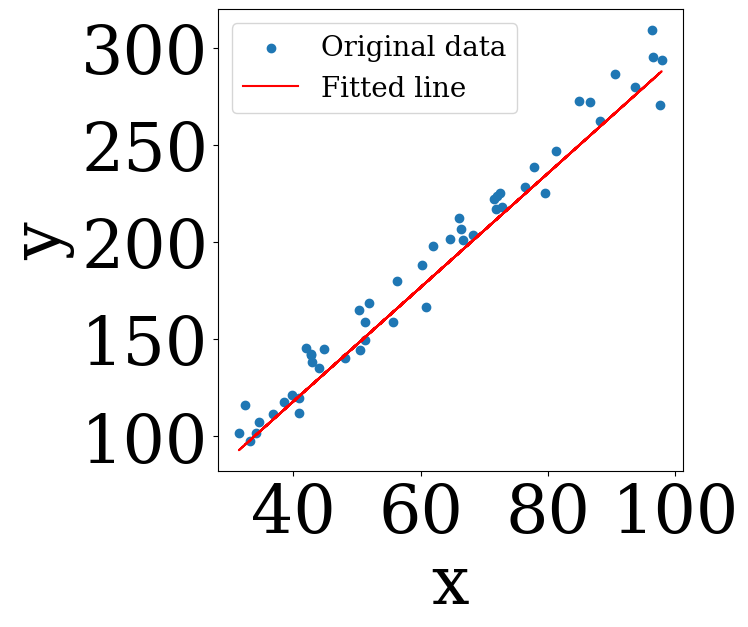

In [41]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.random.uniform(30, 100, 50)  # Random x values
y = 4.0 + 3.0 * x + np.random.normal(0, 10, 50)  # y = 4 + 3x + Gaussian noise

# Convert data to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32).view(-1, 1)*0.1
Y = torch.tensor(y, dtype=torch.float32).view(-1, 1)*0.1

# Initialize parameters (weights)
w_1 = torch.randn(1, requires_grad=True, dtype=torch.float32)  # Weight for X
w_0 = torch.randn(1, requires_grad=True, dtype=torch.float32)  # Bias term

# Initialize parameters (weights) with zero
# w_1 = torch.zeros(1, requires_grad=True, dtype=torch.float32)  # Weight for X
# w_0 = torch.zeros(1, requires_grad=True, dtype=torch.float32)  # Bias term


# Lists to store w_1, w_0 values over epochs
w_1_vals = []
w_0_vals = []

# Define the Linear Regression model manually
def model(X):
    return w_1 * X + w_0

# Loss function: Mean Squared Error
def mse_loss(Y_pred, Y_true):
    return torch.mean((Y_pred - Y_true)**2)

# Optimizer: Using SGD (Stochastic Gradient Descent)
learning_rate = 0.0001
epochs = 500
for epoch in range(epochs):
    # Forward pass: Compute predicted y
    Y_pred = model(X)
    
    # Compute loss
    loss = mse_loss(Y_pred, Y)
    
    # Backward pass: Compute gradients
    loss.backward()
    
    # Update parameters manually
    with torch.no_grad():
        w_1 -= learning_rate * w_1.grad
        w_0 -= learning_rate * w_0.grad
        
        # Zero the gradients after updating
        w_1.grad.zero_()
        w_0.grad.zero_()
        
    # Store the values of w_1 and w_0 at each epoch
    w_1_vals.append(w_1.item())
    w_0_vals.append(w_0.item())
    
    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Print the learned parameters
print(f'Learned weight: {w_1.item():.4f}')
print(f'Learned bias: {w_0.item():.4f}')


fig, ax = plt.subplots(figsize=(6, 6))
plt.rcParams['font.size'] = 20
# Plot the results
plt.scatter(x, y, label='Original data')
plt.plot(x, w_1.item() * x + w_0.item(), label='Fitted line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


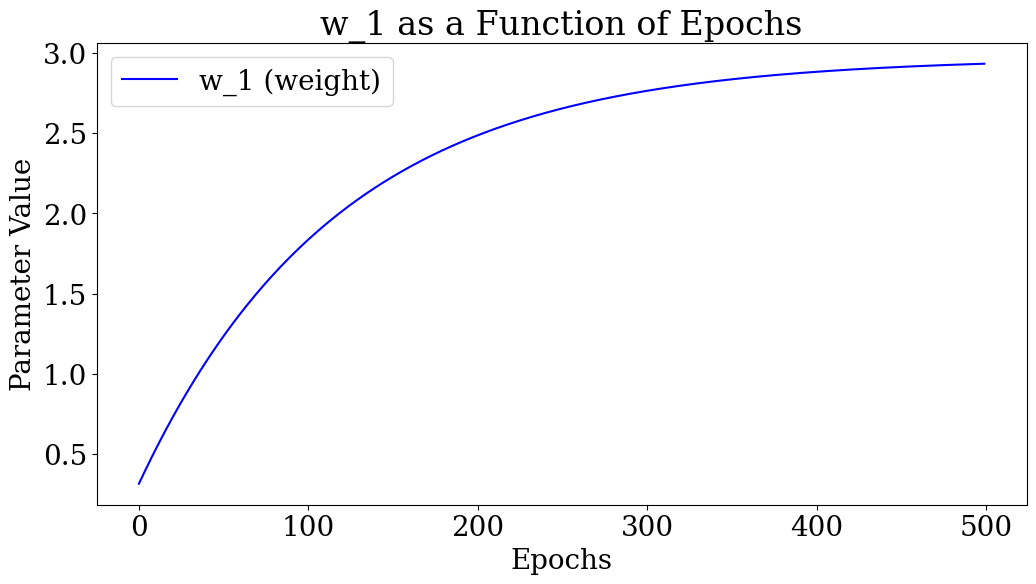

In [42]:
# Plot w_1 and w_0 as a function of epochs
fig, ax = plt.subplots(figsize=(12, 6))

# Plot w_1 and w_0 over epochs
ax.plot(range(epochs), w_1_vals, label='w_1 (weight)', color='blue')
ax.set_xlabel('Epochs')
ax.set_ylabel('Parameter Value')
ax.set_title('w_1 as a Function of Epochs')
ax.legend()

plt.show()


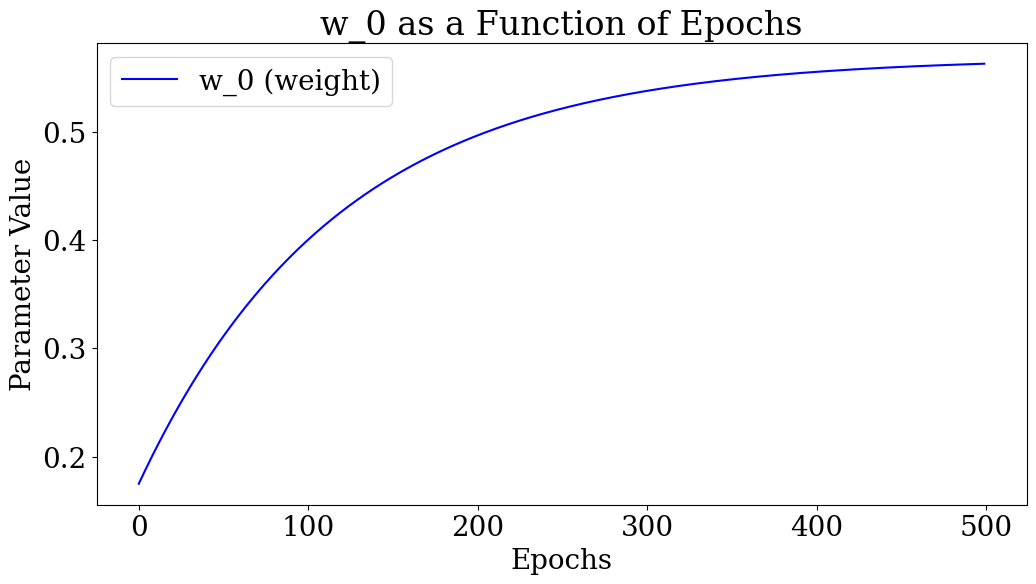

In [43]:
# Plot w_1 and w_0 as a function of epochs
fig, ax = plt.subplots(figsize=(12, 6))

# Plot w_1 and w_0 over epochs
ax.plot(range(epochs), w_0_vals, label='w_0 (weight)', color='blue')
ax.set_xlabel('Epochs')
ax.set_ylabel('Parameter Value')
ax.set_title('w_0 as a Function of Epochs')
ax.legend()

plt.show()


In [44]:
# New data points
new_data_points = torch.tensor([4.5, 19.91, 59.23], dtype=torch.float32)

# Make predictions
predictions = model(new_data_points).detach().numpy()

# Print predictions
for x_new, pred in zip(new_data_points, predictions):
    print(f"The predicted value for x={x_new.item()} is {pred}")

The predicted value for x=4.5 is 13.764214515686035
The predicted value for x=19.90999984741211 is 58.97184371948242
The predicted value for x=59.22999954223633 is 174.3231658935547


In [45]:
# Predictions
y_hat = model(X)

# MSE (Mean Squared Error)
MSE = torch.mean((Y - y_hat) ** 2)

print(f'MSE: {MSE}')
# SSE (Sum of Squared Errors)
SSE = torch.sum((Y - y_hat) ** 2)

# SSTO (Total Sum of Squares)
SSTO = torch.sum((Y - torch.mean(Y)) ** 2)

# R-squared
R_squared = 1 - (SSE / SSTO)

# Print the R-squared value
print(f'R-squared: {R_squared.item():.4f}')

# Variance of w_1
variance_w1 = MSE / torch.sum((X - torch.mean(X)) ** 2)

# Variance of w_0
variance_w0 = MSE * (1 / len(x) + (torch.mean(X) ** 2) / torch.sum((X - torch.mean(X)) ** 2))

# Print the variances
print(f'Variance of w_1: {variance_w1.item():.4f}')
print(f'Variance of w_0: {variance_w0.item():.4f}')




MSE: 0.8856196403503418
R-squared: 0.9755
Variance of w_1: 0.0044
Variance of w_0: 0.1833


In [46]:
import torch

import scipy.stats as stats

# Degrees of freedom
df = 8
# Quantile
p = 0.975

# Calculate the t-statistic (quantile) using scipy
t_statistic = stats.t.ppf(p, df)

# Compute w1_upper and w1_lower
w1_upper = w_1 + t_statistic * torch.sqrt(variance_w1)
w1_lower = w_1 - t_statistic * torch.sqrt(variance_w1)

# Print the results
print(f'w1_upper: {w1_upper.item():.4f}')
print(f'w1_lower: {w1_lower.item():.4f}')


w1_upper: 3.0870
w1_lower: 2.7803


In [47]:
w0_upper = w_0 + t_statistic*torch.sqrt(variance_w0)
w0_lower = w_0 - t_statistic*torch.sqrt(variance_w0)
# Print the results
print(f'w0_upper: {w0_upper.item():.4f}')
print(f'w0_lower: {w0_lower.item():.4f}')


w0_upper: 1.5501
w0_lower: -0.4246


In [53]:
x_bar = torch.mean(X)  # Mean of X
sum_x_i_x_bar_sq = torch.sum((X - x_bar) ** 2)  # Sum of (x_i - x_bar)^2
n = len(X)
variance_y = MSE * ((1.0/n) +  ((X - x_bar) ** 2 / sum_x_i_x_bar_sq))
std_y = torch.sqrt(variance_y)
std_y = std_y *100 #enhance the variance for display purposes
# variance_y

Text(0.5, 1.0, 'WHS Band')

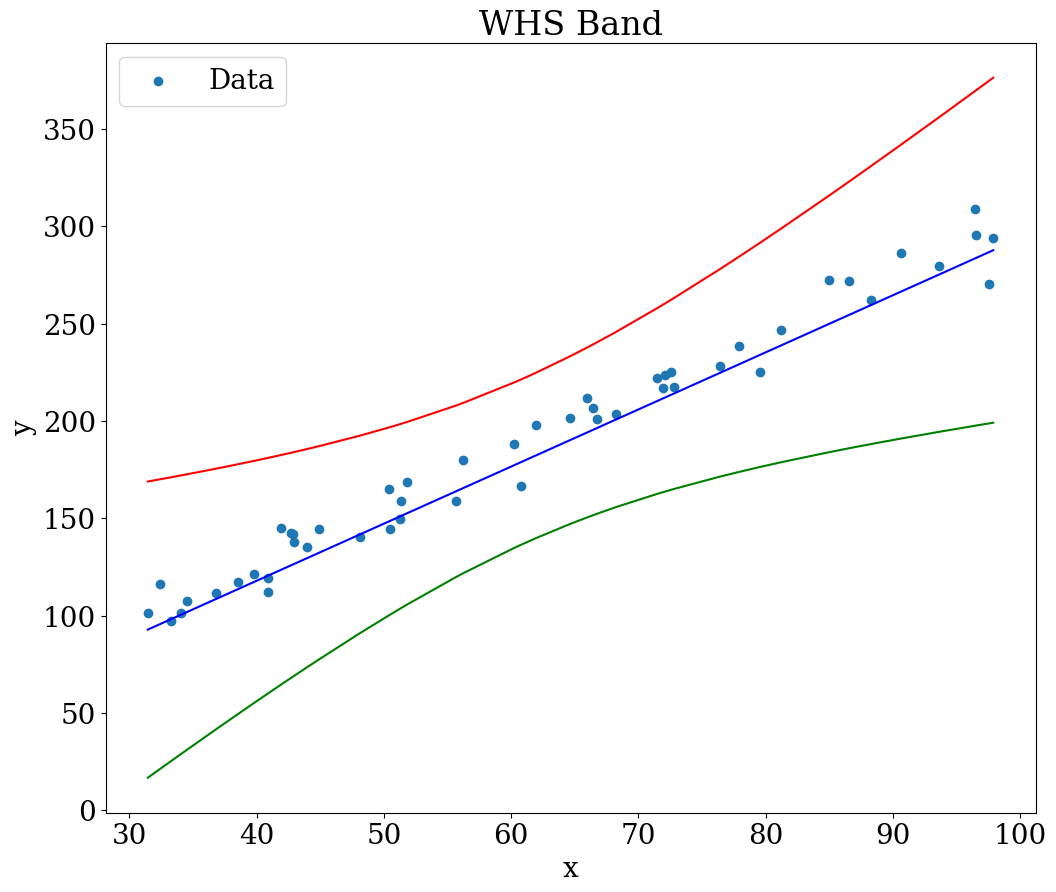

In [54]:
from scipy.stats import f

# Degrees of freedom
df1 = 2
df2 = len(x) - 2  # replace n with your sample size

# Quantile
p = 1 - 0.05  # replace alpha with your significance level

# Calculate the F-statistic
f_statistic = f.ppf(p, df1, df2)


yh = w_1.item() * x + w_0.item()


y_upper = yh + f_statistic*std_y.detach().numpy().reshape(1,-1)[0]
y_lower = yh - f_statistic*std_y.detach().numpy().reshape(1,-1)[0]



# Sort x, y_lower, and y_upper using the sorted indices
sorted_indices = np.argsort(x)
x_ = x[sorted_indices]
yh_ = yh[sorted_indices]
y_ = y[sorted_indices]
y_lower_ = y_lower[sorted_indices]
y_upper_ = y_upper[sorted_indices]

# Plot the data and the learned line
plt.figure(figsize=(12,10))
plt.scatter(x_, y_, label='Data')
plt.plot(x_, yh_, color='blue')
plt.plot(x_, y_lower_, color='green')
plt.plot(x_, y_upper_, color='red')
#plt.fill_between(x_sorted, y_lower_sorted, y_upper_sorted, color='gray', alpha=0.5)  
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('WHS Band')